In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [3]:
credito = pd.read_csv('dados/Credit.csv')

In [6]:
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [7]:
previsores = credito.iloc[:,0:20].values

In [8]:
classe = credito.iloc[:,20].values

In [9]:
#transformando atributos nominais em numéricos
from sklearn.preprocessing import LabelEncoder

In [13]:
labelencoder = LabelEncoder()

In [16]:
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])

In [17]:
previsores[0:10]

array([[2, 6, "'critical/other existing credit'", 'radio/tv', 1169,
        "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
        "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes',
        'yes'],
       [1, 48, "'existing paid'", 'radio/tv', 5951, '<100', '1<=X<4', 2,
        "'female div/dep/mar'", 'none', 2, "'real estate'", 22, 'none',
        'own', 1, 'skilled', 1, 'none', 'yes'],
       [0, 12, "'critical/other existing credit'", 'education', 2096,
        '<100', '4<=X<7', 2, "'male single'", 'none', 3, "'real estate'",
        49, 'none', 'own', 1, "'unskilled resident'", 2, 'none', 'yes'],
       [2, 42, "'existing paid'", 'furniture/equipment', 7882, '<100',
        '4<=X<7', 2, "'male single'", 'guarantor', 4, "'life insurance'",
        45, 'none', "'for free'", 1, 'skilled', 2, 'none', 'yes'],
       [2, 24, "'delayed previously'", "'new car'", 4870, '<100',
        '1<=X<4', 3, "'male single'", 'none', 4, "'no known property'",
        53, 'none', 

In [18]:
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [19]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [20]:
x_treinamento[0]

array([1, 24, 1, 6, 11938, 3, 0, 2, 3, 0, 3, 3, 39, 1, 1, 2, 0, 2, 1, 1],
      dtype=object)

In [22]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
#previsões
previsoes = naive_bayes.predict(x_teste)

In [25]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
confusao = confusion_matrix(y_teste, previsoes)

In [27]:
confusao

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [29]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.71

In [30]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29000000000000004

In [36]:
#visualização
from yellowbrick.classifier import ConfusionMatrix

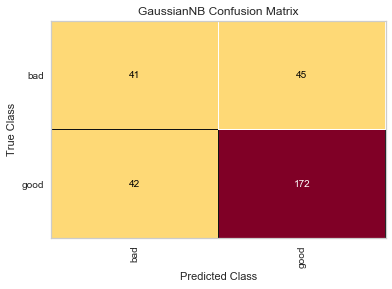

In [38]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

In [45]:
#simulando modelo em produção
novo_credito = pd.read_csv('dados/NovoCredit.csv')

In [46]:
novo_credito = novo_credito.iloc[:,0:20].values

In [47]:
novo_credito[:,0] = labelencoder.fit_transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder.fit_transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder.fit_transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder.fit_transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder.fit_transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder.fit_transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder.fit_transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder.fit_transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder.fit_transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder.fit_transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder.fit_transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder.fit_transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder.fit_transform(novo_credito[:,19])

In [48]:
novo_credito

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

In [49]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')